<a href="https://colab.research.google.com/github/taliafabs/sta365-winter2025/blob/main/sta365hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA365 Homework 7: GLMs and Shrinkage

## Question 1: Derive the following


1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $MVN(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

we know that:
\begin{align*}
p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I) &\propto p(\textbf{y}|\boldsymbol \beta) p(\boldsymbol \beta) \\
p(\textbf{y}|\boldsymbol \beta) &= \exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \\
p(\boldsymbol \beta) &= MVN(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta) \propto \exp \left(-{\frac {1}{2}}(\boldsymbol \beta - \boldsymbol \beta_0)^\top \Sigma^{-1}_\beta (\boldsymbol \beta - \boldsymbol \beta_0) \right)
\end{align*}

putting together the likelihood and prior, ignoring normalization constants, we get:
\begin{align*}
p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I) &\propto \exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \cdot \exp \left(-{\frac {1}{2}}(\boldsymbol \beta - \boldsymbol \beta_0)^\top \Sigma^{-1}_\beta (\boldsymbol \beta - \boldsymbol \beta_0) \right) \\
&\propto \exp \left[- \frac{1}{2} \left(
  (\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta}) +
  (\boldsymbol \beta - \boldsymbol \beta_0)^\top \Sigma^{-1}_\beta (\boldsymbol \beta - \boldsymbol \beta_0)
  \right) \right]
\end{align*}

expanding the quadratic terms:
\begin{align*}
(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top (\mathbf {y} -\mathbf{X\boldsymbol \beta}) &= \mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X}\boldsymbol \beta + \boldsymbol \beta^\top X^\top \mathbf{X} \boldsymbol \beta \\
(\boldsymbol \beta - \boldsymbol \beta_0)^\top (\boldsymbol \beta - \boldsymbol \beta_0) &= \boldsymbol \beta^\top \boldsymbol \beta - 2 \boldsymbol \beta^\top \boldsymbol \beta_0 + \boldsymbol \beta^\top \boldsymbol \beta
\end{align*}

re-writing the posterior:
\begin{align*}
p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I) &\propto -\frac{1}{2} \left[ \mathbf{y}^\top \Sigma^{-1} \mathbf{y} - 2 \mathbf{y}^\top \Sigma^{-1} \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\top \mathbf{X}^\top \Sigma^{-1} \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta} - 2 \boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta} + \boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right] \\
&\propto -\frac{1}{2} \left[ \boldsymbol{\beta}^\top (\mathbf{X}^\top \Sigma^{-1} \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1}) \boldsymbol{\beta} - 2 \boldsymbol{\beta}^\top (\mathbf{X}^\top \Sigma^{-1} \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0) \right] \\
&\propto \exp \left( -\frac{1}{2} \left( \boldsymbol{\beta} - \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1} \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right) \right)^\top \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1} \left( \boldsymbol{\beta} - \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1} \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right) \right) \right) \\
&= \exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_\text{post})^\top \boldsymbol{\Sigma}_\text{post}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_\text{post}) \right)
\end{align*}
where $\boldsymbol{\beta}_\text{post} = \boldsymbol{\Sigma}_\text{post} \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right)$ and $\boldsymbol{\Sigma}_\text{post} = \left( \mathbf{X}^\top \Sigma^{-1} \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1}$.

Therefore, $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I) = MVN(\boldsymbol \beta_{post}, \boldsymbol \sigma_{post})$


2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### Optional
Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*

## Question 2: Perform Bayesian Linear Regression
- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma`
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

#### Dataset



I am using the `sklearn` California housing dataset.

Predictors (Betas):


*  MedInc
* HouseAge
* AveRooms
* AveBedrooms
* Population
* AveOccup
* Latitude
* Longditude

Target (y):
* MedHouseVal



In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing_data = fetch_california_housing(as_frame=True)
df = california_housing_data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# set up X and y and normalize the data

# get X and y
X = df.drop('MedHouseVal', axis=1).to_numpy()
y = df['MedHouseVal']

# normalize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

#### Perform Bayesian Linear Regression in PyMC

In [ ]:
n, p = X.shape
with pm.Model() as BayesianLR:
  beta0 = pm.Normal('beta0', mu=0, sigma=1000)
  betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
  sigma = pm.HalfNormal('sigma', sigma=10)
  y_obs = pm.Normal('y_obs', mu= X@betas, sigma=sigma, observed=y)
  idata = pm.sample(2000, tune=1000, return_inferencedata=True)

Output()

#### Bayesian inference

In [ ]:
# Bayesian inference
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,48.60940,1004.97469,-1654.02931,2063.01299,17.70274,22.80746,3224.21034,1585.10995,1.00080
betas[0],37.77558,0.90880,36.07476,39.50139,0.01799,0.01273,2578.30954,1929.42869,1.00060
betas[1],4.95990,0.29697,4.42143,5.51584,0.00546,0.00387,2937.94566,1881.74461,1.00000
betas[2],5.46031,0.80553,4.00485,7.00698,0.01465,0.01053,3024.72267,1439.76563,1.00079
betas[3],-7.31757,0.92102,-8.97575,-5.56434,0.01906,0.01348,2345.64944,1853.35970,1.00175
betas[4],0.00438,0.00361,-0.00276,0.01061,0.00007,0.00006,2866.20166,2022.31773,1.00152
betas[5],-2.25529,0.36535,-2.94417,-1.57351,0.00624,0.00441,3447.57226,1569.82431,1.00123
betas[6],-16.03654,0.83554,-17.59175,-14.44662,0.01416,0.01002,3482.86292,1938.12702,1.00196
betas[7],-14.25103,0.66452,-15.54280,-13.05209,0.01445,0.01022,2109.78471,1857.21259,1.00114
sigma,0.90376,0.00494,0.89428,0.91258,0.00009,0.00007,2866.40760,1838.81510,0.99984


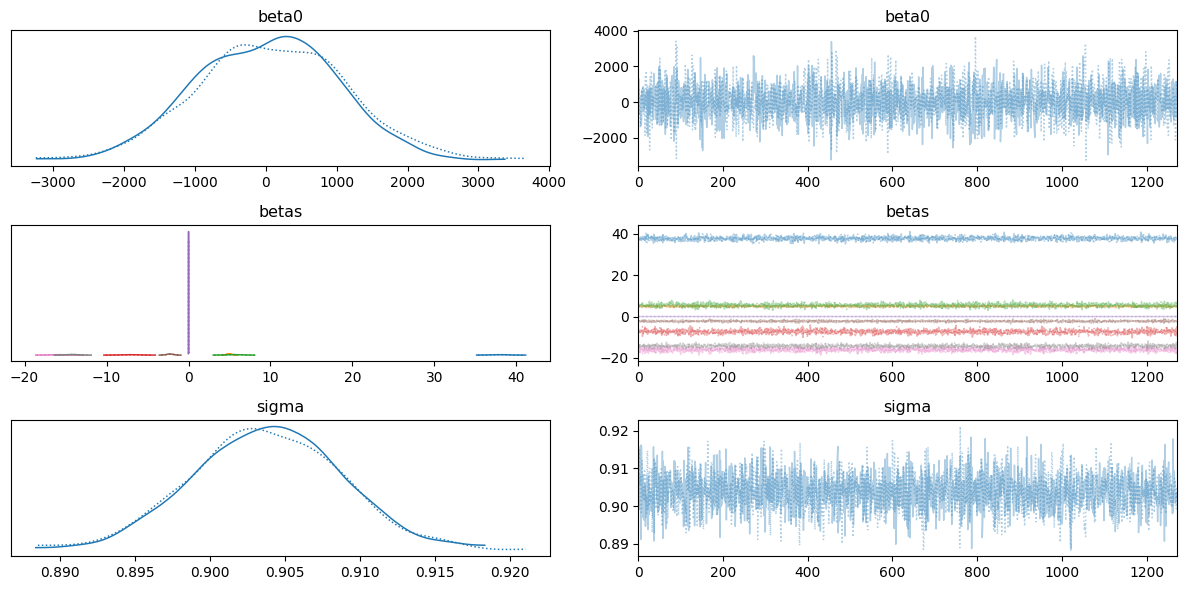

In [ ]:
az.plot_trace(idata)
plt.tight_layout()
plt.show()

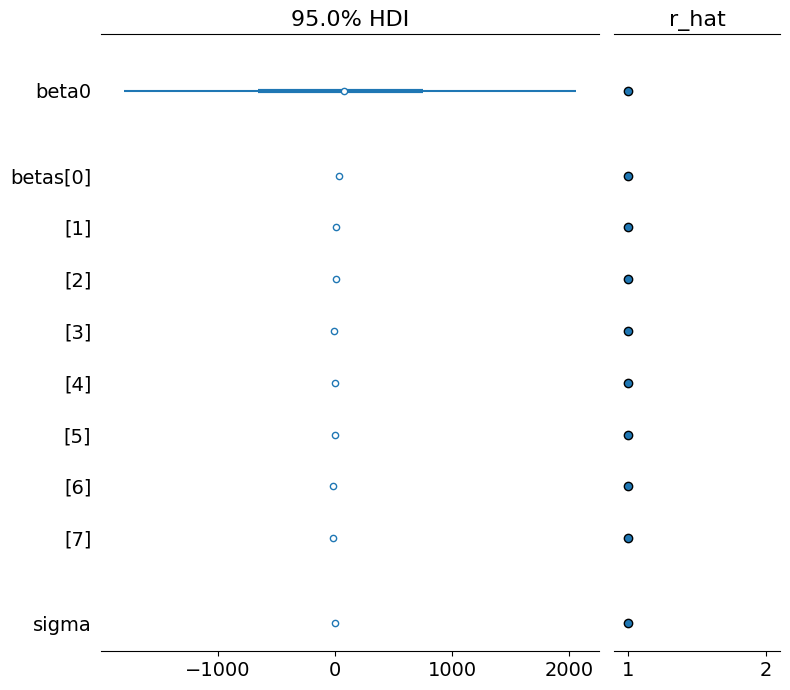

In [ ]:
az.plot_forest(idata, var_names=['beta0', 'betas', 'sigma'],
               combined=True,
               hdi_prob = 0.95,
               r_hat = True)
plt.tight_layout()
plt.show()

<Axes: >

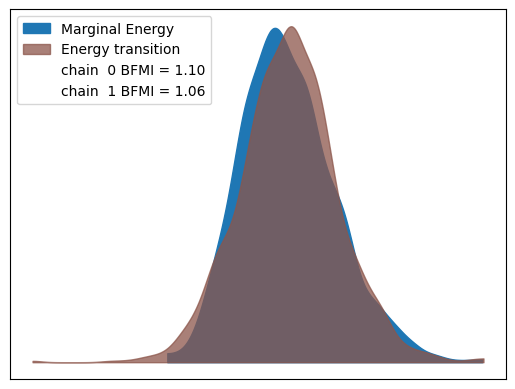

In [ ]:
az.plot_energy(idata)

Output()

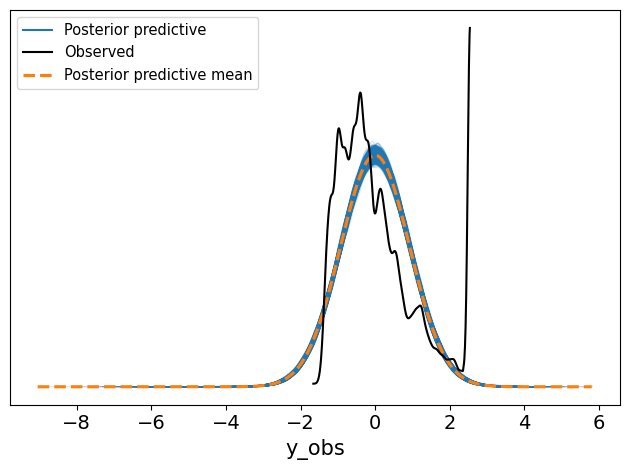

In [ ]:
with BayesianLR:
  idata_ppc = pm.sample_posterior_predictive(idata)

az.plot_ppc(idata_ppc)
plt.tight_layout()
plt.show()

#### More Diagnostics

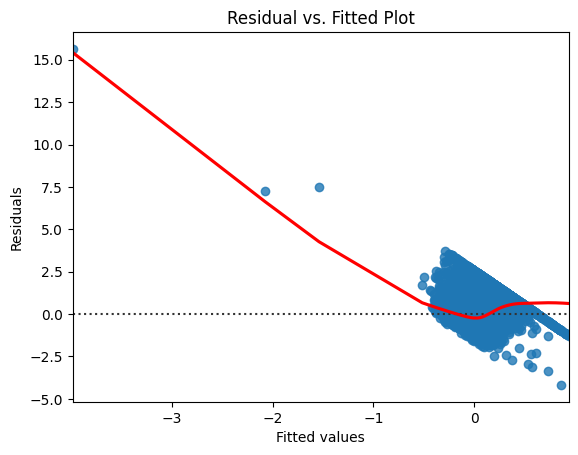

In [ ]:
y_pred = idata_ppc.posterior_predictive['y_obs'].mean(axis=(0,1))
residuals = y - y_pred

# residual vs fitted plot
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

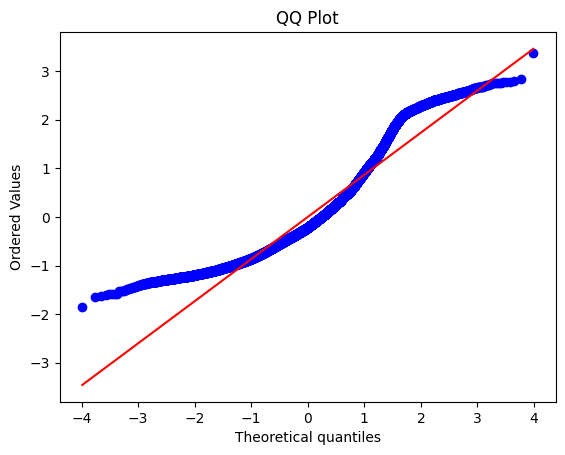

In [ ]:
## qq plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

Discussion

## Question 3: Perform robust Bayesian Linear Regression
Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$.

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers"
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

In [ ]:
# manipulate dataset to have some weird outliers
df_outlier = df.copy()
df_outlier.head()
X_outlier = df_outlier.drop('MedHouseVal', axis=1).to_numpy()
y_outlier = df_outlier['MedHouseVal']

# create some weird outlier rows where median house value is ballooned
n = X_outlier.shape[0]
# make 5% of the observations in y either balloon or become ridiculously small
num_outliers = int(0.05 * n)
outlier_indices = np.random.choice(n, num_outliers, replace=False)
multiplier = np.random.choice([100, 0.01], size=num_outliers)
y_outlier[outlier_indices] *= multiplier
# y_outlier.iloc[outlier_indices] *= multiplier

# normalize the data
X_outlier = (X_outlier - X_outlier.mean()) / X_outlier.std()
y_outlier = (y_outlier - y_outlier.mean()) / y_outlier.std()
p = X_outlier.shape[1]

# perform bayesian linear regression
with pm.Model() as outlier_model:
  beta0 = pm.Normal('beta0', mu=0, sigma=1000)
  betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
  tau = pm.HalfNormal('tau', sigma=10)
  nu = pm.Exponential('nu', 1)
  lam = pm.Gamma('lam', alpha=nu/2, beta=1/(2*nu))
  sigma_i = 1 / np.sqrt(tau * lam)
  y_obs = pm.Normal('y_obs', mu= X_outlier@betas, sigma=sigma_i, observed=y_outlier)
  idata2 = pm.sample(2000, tune=1000, return_inferencedata=True)

Output()

#### Bayesian infefrence and mcmc diagnostics

In [ ]:
vars = ['beta0', 'betas', 'tau', 'nu']
az.summary(idata2, var_names = vars, round_to=5)

In [ ]:
# trace plot for diagnostics
az.plot_trace(idata2, var_names = vars)
plt.tight_layout()
plt.show()

In [ ]:
# forest plot
az.plot_forest(idata2, var_names = vars,
               combined=True,
               hdi_prob = 0.95,
               r_hat = True)
plt.tight_layout()
plt.show()

In [ ]:
# residuals vs fitted plot